In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("Cleaned.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707962 entries, 0 to 1707961
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   datetime          object 
 1   Date              float64
 2   hour              float64
 3   min               float64
 4   latitude          float64
 5   longitude         float64
 6   speed             float64
 7   truck             object 
 8   svr1              float64
 9   svr2              float64
 10  svr3              float64
 11  svr4              float64
 12  Transfer size     float64
 13  Bitrate           float64
 14  Retransmissions   float64
 15  CWnd              float64
 16  Transfer size-RX  float64
 17  Bitrate-RX        float64
 18  send_data         float64
 19  square_id         object 
dtypes: float64(17), object(3)
memory usage: 260.6+ MB


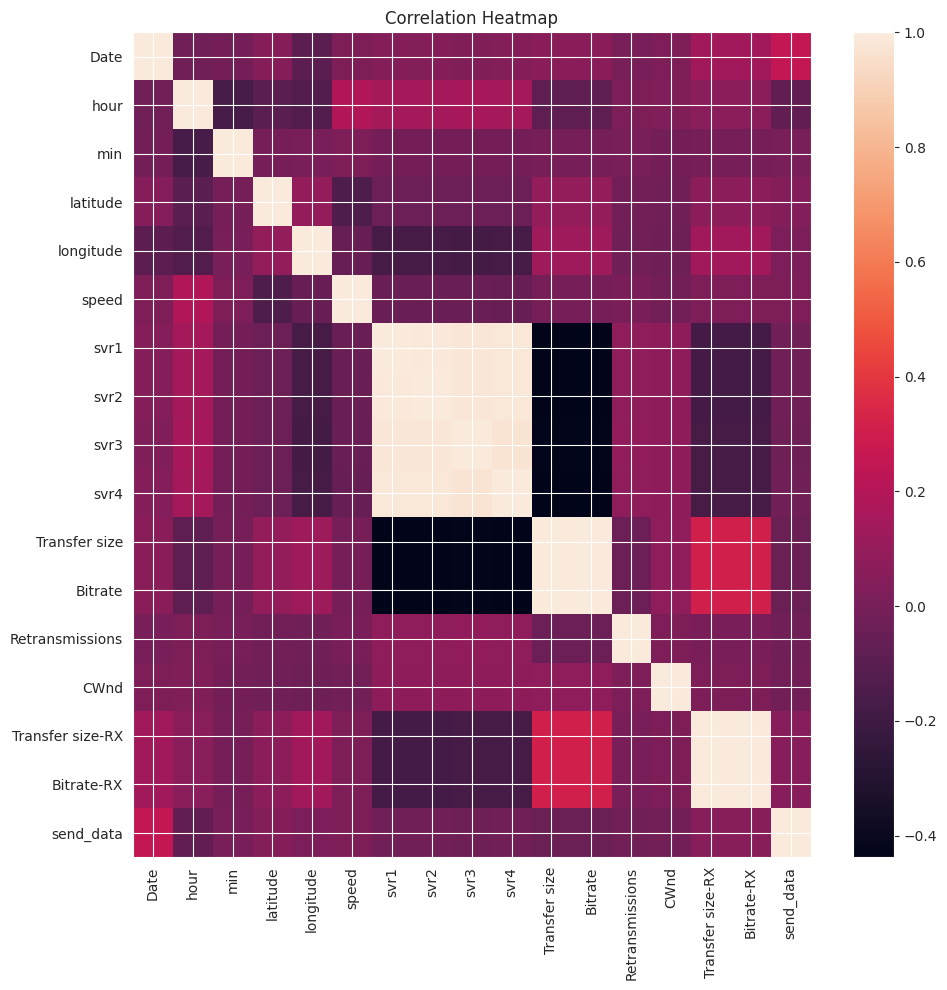

In [5]:
import matplotlib.pyplot as plt

# 1. Compute correlation matrix of numeric columns
corr = df.select_dtypes(include='number').corr()

# 2. Plot
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corr, aspect='auto')

# 3. Tick labels
labels = corr.columns
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels)

# 4. Colorbar and layout
fig.colorbar(im, ax=ax)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


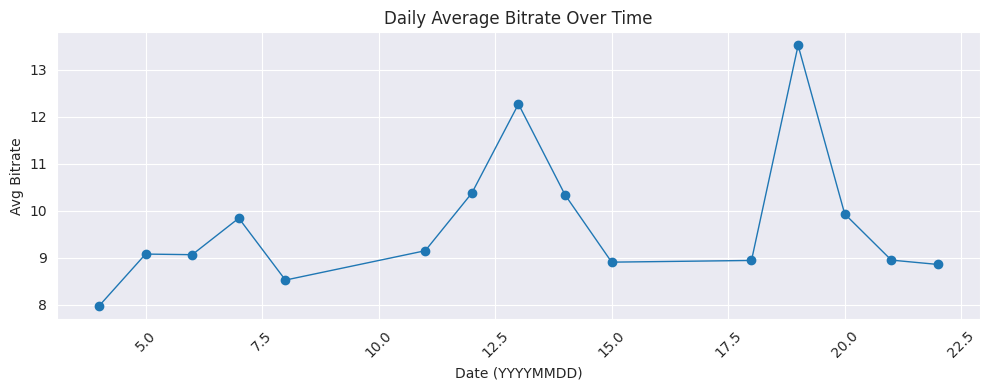

In [9]:
import matplotlib.pyplot as plt

# Aggregate by Date (assuming Date is YYYYMMDD float)
daily = df.groupby('Date')['Bitrate'].mean().sort_index()

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(daily.index, daily.values, marker='o', linewidth=1)
ax.set_xlabel('Date (YYYYMMDD)')
ax.set_ylabel('Avg Bitrate')
ax.set_title('Daily Average Bitrate Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


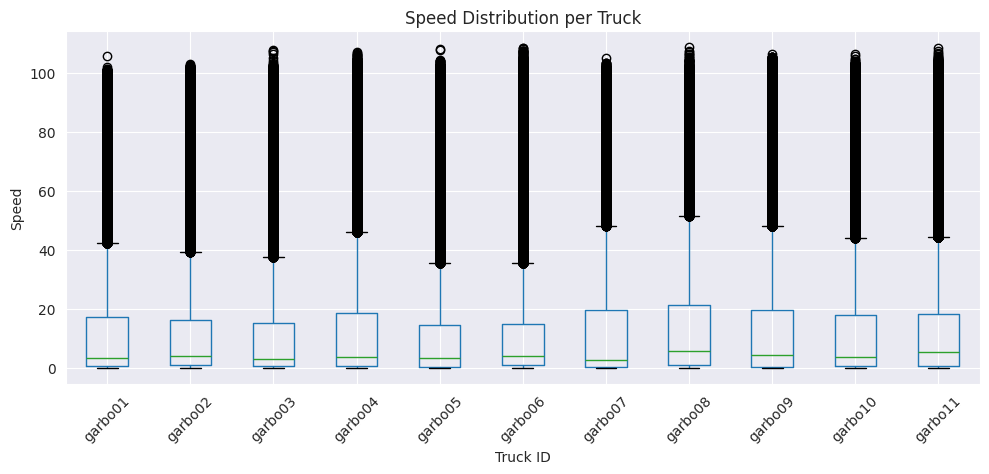

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
df.boxplot(column='speed', by='truck', ax=ax, rot=45)
ax.set_xlabel('Truck ID')
ax.set_ylabel('Speed')
ax.set_title('Speed Distribution per Truck')
plt.suptitle('')  # remove automatic “Boxplot grouped by truck” subtitle
plt.tight_layout()
plt.show()


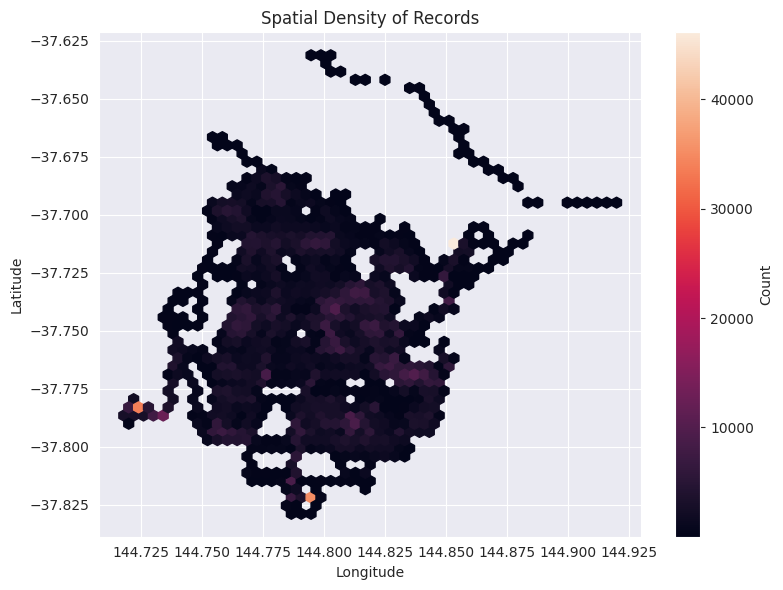

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
hb = ax.hexbin(
    df['longitude'],
    df['latitude'],
    gridsize=50,
    mincnt=1
)
fig.colorbar(hb, ax=ax, label='Count')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Spatial Density of Records')
plt.tight_layout()
plt.show()


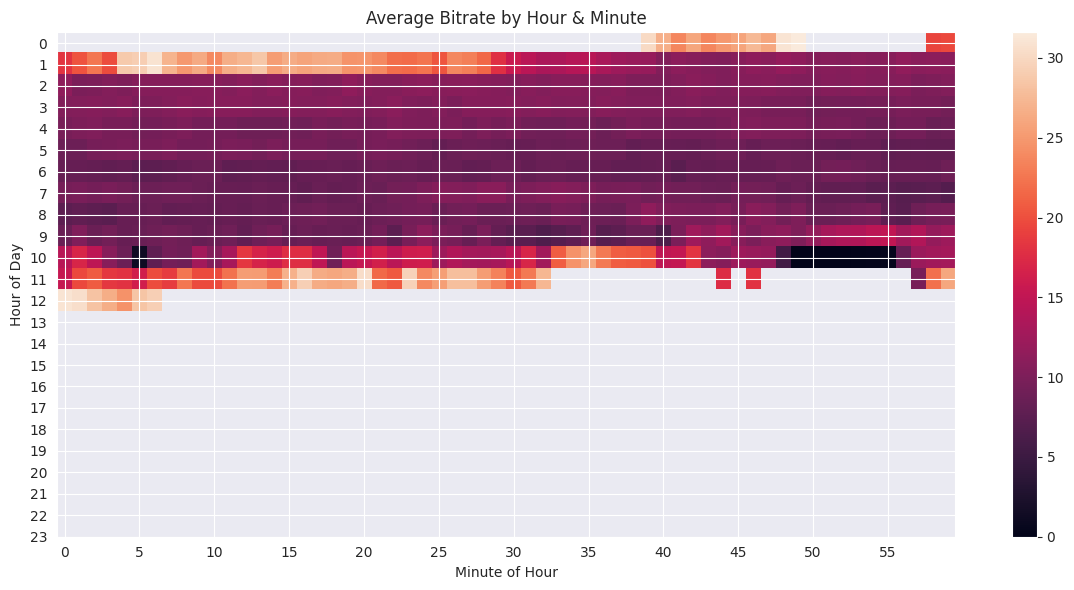

In [7]:
# 1. Ensure hour/min are integers
df['hour'] = df['hour'].astype(int)
df['min']  = df['min'].astype(int)

# 2. Pivot to get mean Bitrate for each (hour, minute)
pivot = df.pivot_table(
    index='hour',
    columns='min',
    values='Bitrate',
    aggfunc='mean'
)

# 3. Plot
fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(pivot, aspect='auto')

# 4. Axis ticks
ax.set_xticks(range(0,60,5))
ax.set_xticklabels(range(0,60,5))
ax.set_yticks(range(0,24,1))
ax.set_yticklabels(range(0,24,1))

fig.colorbar(im, ax=ax)
plt.xlabel('Minute of Hour')
plt.ylabel('Hour of Day')
plt.title('Average Bitrate by Hour & Minute')
plt.tight_layout()
plt.show()


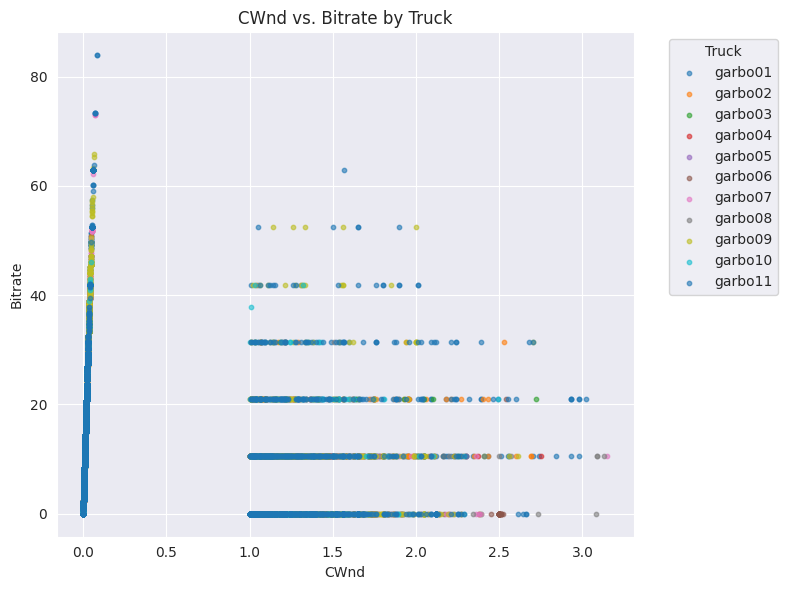

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
for t, grp in df.groupby('truck'):
    ax.scatter(
        grp['CWnd'],
        grp['Bitrate'],
        s=10,
        label=t,
        alpha=0.6
    )
ax.set_xlabel('CWnd')
ax.set_ylabel('Bitrate')
ax.set_title('CWnd vs. Bitrate by Truck')
ax.legend(title='Truck', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


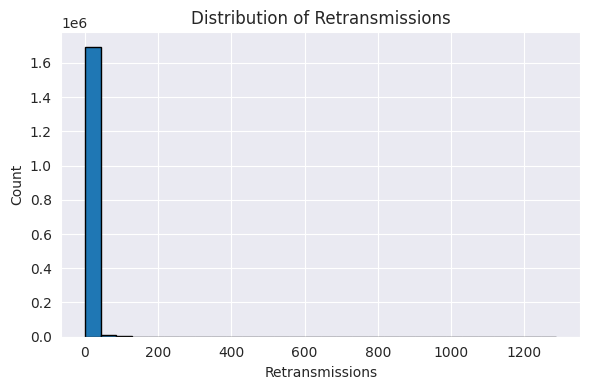

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['Retransmissions'].dropna(), bins=30, edgecolor='black')
ax.set_xlabel('Retransmissions')
ax.set_ylabel('Count')
ax.set_title('Distribution of Retransmissions')
plt.tight_layout()
plt.show()


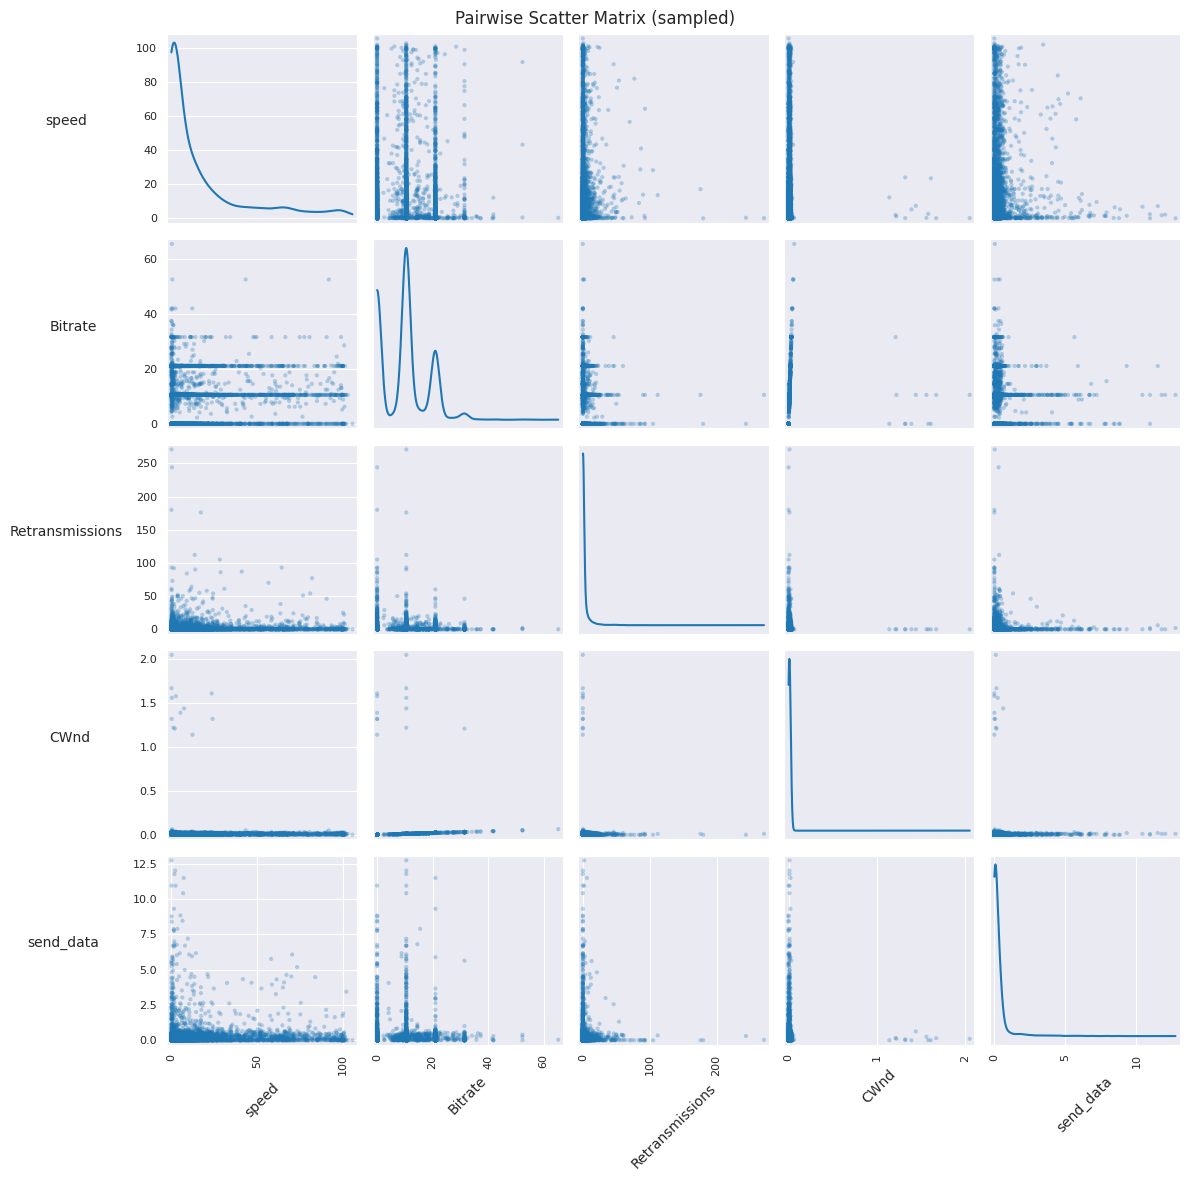

In [13]:
import pandas as pd
from pandas.plotting import scatter_matrix

cols = ['speed','Bitrate','Retransmissions','CWnd','send_data']
sm = scatter_matrix(df[cols].sample(n=5000, random_state=1), 
                    figsize=(12,12), 
                    diagonal='kde', 
                    alpha=0.3)
# rotate labels
for ax in sm.ravel():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.labelpad = 50
plt.suptitle('Pairwise Scatter Matrix (sampled)')
plt.tight_layout()
plt.show()
